# images

using https://platform.openai.com/docs/guides/images/usage?context=python

In [1]:
import sys
sys.path.append("../")

from blueflow import notebooks

from blue_options import string
from blue_objects import objects

from openai_commands.host import signature
from openai_commands.images.api import OpenAIImageGenerator
from openai_commands.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🛠️  openai_commands-3.209.1.blueflow-4.849.1.abcli-9.486.1.blue_objects-5.281.1.blue_options-4.200.1.torch-2.5.1.Python 3.9.6.Darwin 23.6.0..Jupyter-Notebook,
built on 01 February 2025, 11:14:47


---

In [2]:
prompt = "a person flying through the streets of Vancouver."

In [3]:
object_name = objects.unique_object("openai-images")
filename = objects.path_of(f"{string.timestamp()}.png",object_name)

🌀  📂 openai-images-2025-02-01-11-14-47-k47mxq


In [4]:
generator = OpenAIImageGenerator(verbose=True)

🛠️  OpenAIImageGenerator[dall-e-3]


🛠️  OpenAIImageGenerator.generate: a person flying through the streets of Vancouver.
httpx HTTP Request: POST https://api.openai.com/v1/images/generations "HTTP/1.1 200 OK"
🛠️  {
    "created": 1738437300,
    "data": [
        {
            "b64_json": null,
            "revised_prompt": "A middle-aged Hispanic woman in professional attire, with her brunette hair pulled back in a high ponytail, levitates through the bustling cityscape of Vancouver. Sky-high buildings dressed in glass and steel envelop her, reflecting the setting sun's golden hues. In her hand, she securely holds a briefcase, suggesting her work of the day is over. Traffic is bustling beneath her, with the city's iconic cyclist lanes, hybrid cars, and electric buses moving in harmony. The scenic backdrop of the mountains and the calm ocean adds a serene touch to the entire scene.",
            "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-1RdONq0eTlgUUnFpmb7DZuWr/user-id8j8e4QMrQ8PpTpUxwnF9Cr/im

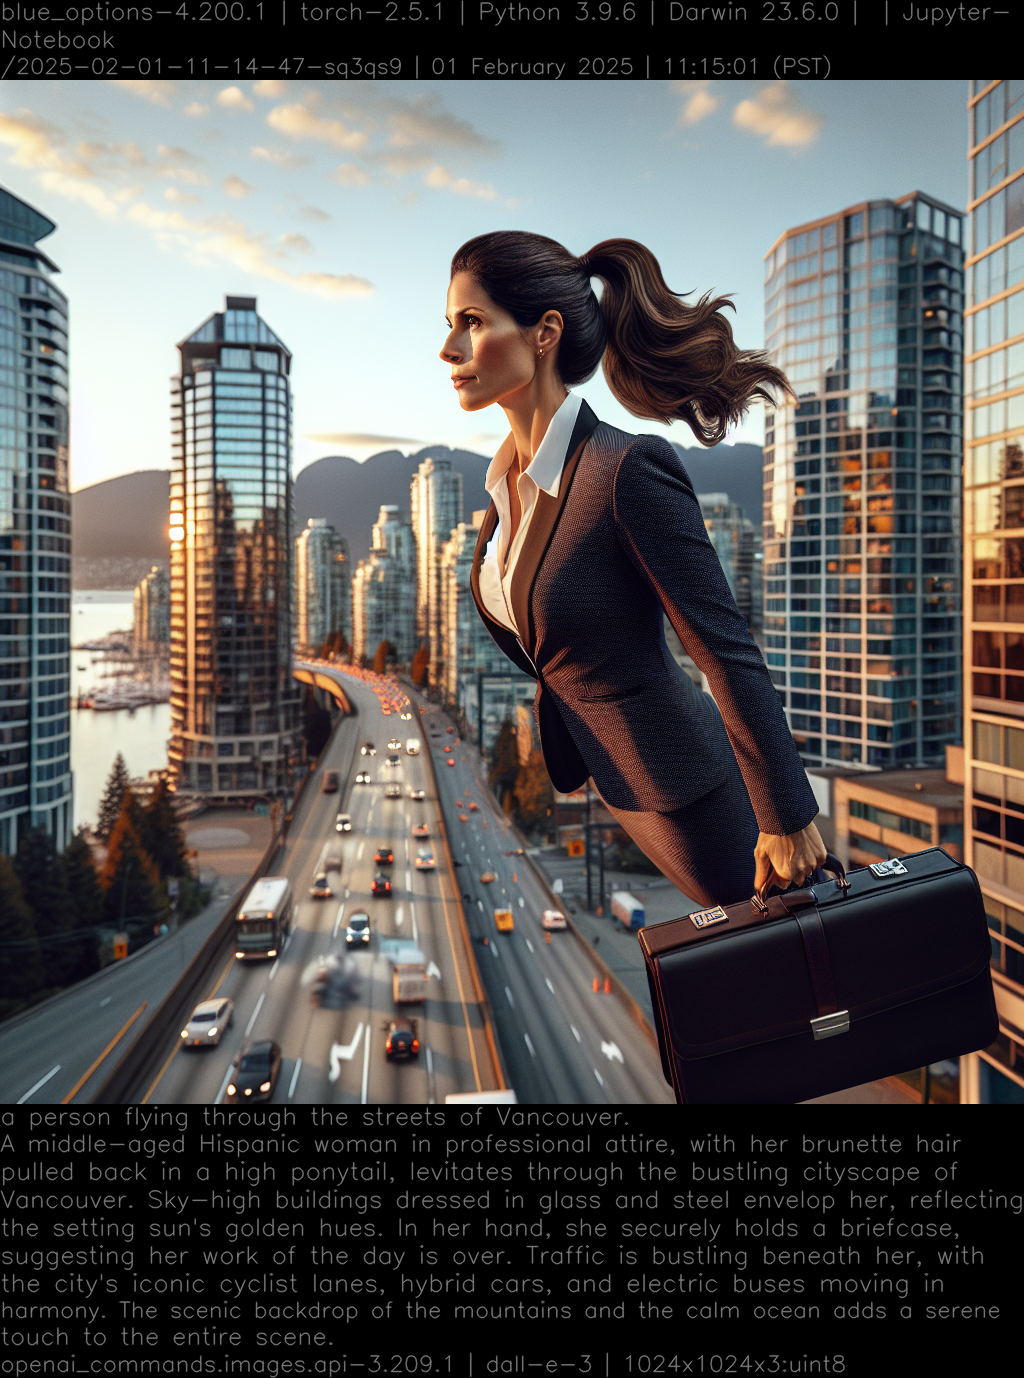

In [5]:
success, response = generator.generate(
    prompt=prompt,
    filename=filename)

assert success

---

In [6]:
assert objects.upload(object_name)

upload: ../../../storage/abcli/openai-images-2025-02-01-11-14-47-k47mxq/2025-02-01-11-14-47-sq3qs9.png to s3://kamangir/bolt/openai-images-2025-02-01-11-14-47-k47mxq/2025-02-01-11-14-47-sq3qs9.png


In [7]:
# END